# M.Sc. Data Science & Big Data Analytics (Sem 2)



### Name: Shriya Shukla
### Project name : Medical Insurance Cost Prediction

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from pandas_profiling import ProfileReport
%matplotlib inline

## Read Dataset

In [2]:
data = pd.read_csv('insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
data.shape

(1338, 7)

## Missing Values

In [7]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Detecting Outliers

<AxesSubplot:>

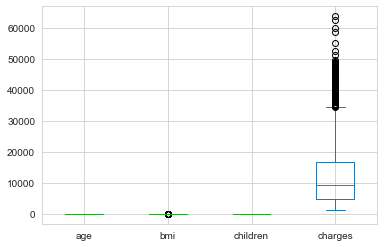

In [8]:
sns.set_style("whitegrid")
data.plot.box()

Looks like we've got outliers in the two features *bmi* and *charges*

### We can use another method to detect outliers in the data

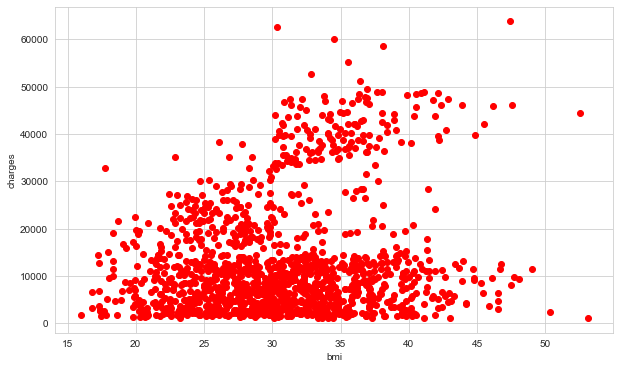

In [9]:
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(data['bmi'],data['charges'],color = 'red')
ax.set_xlabel("bmi")
ax.set_ylabel("charges")
plt.show()

Looking at the plot above we can say that outliers are those which are far from the rest of the population. like the points at the top most, right most position.

**Now let's see them individually**

<AxesSubplot:xlabel='bmi'>

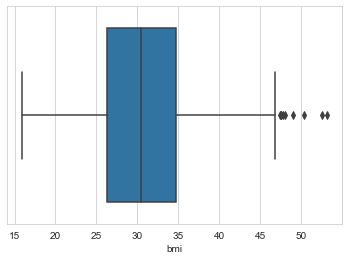

In [10]:
sns.boxplot(x = data['bmi'])

<AxesSubplot:xlabel='charges'>

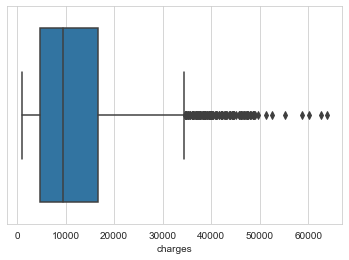

In [11]:
sns.boxplot(x = data['charges'])

**Now look at the charges by different regions**

C:\Users\Kishan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


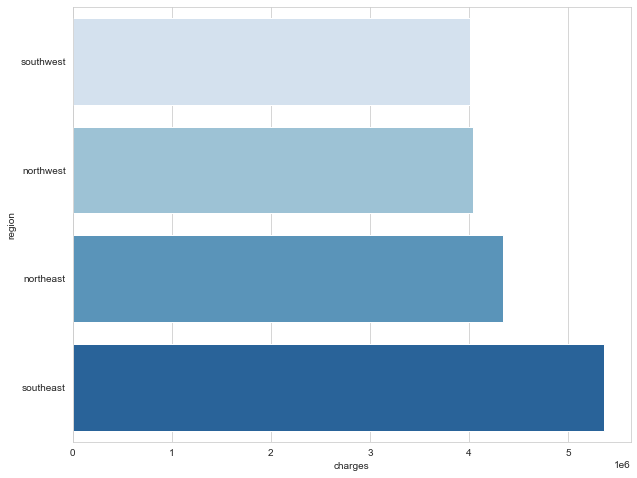

In [12]:
charges = data['charges'].groupby(data.region).sum().sort_values(ascending = True)
f , ax = plt.subplots(1,1,figsize = (10,8))
ax = sns.barplot(charges.head(), charges.head().index, palette = 'Blues')

so it is clear that charges in southwest is lowest and charges in southeast it is highest

**Now considering other factors too. let's see how it changes**

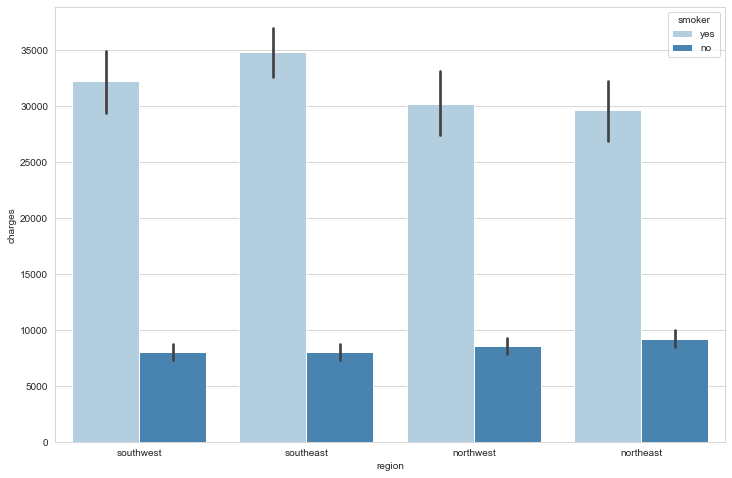

In [13]:
f , ax = plt.subplots(1,1, figsize = (12,8))
ax = sns.barplot(x = 'region' , y = 'charges', hue = 'smoker', data = data , palette = 'Blues')

**Point the same for children**

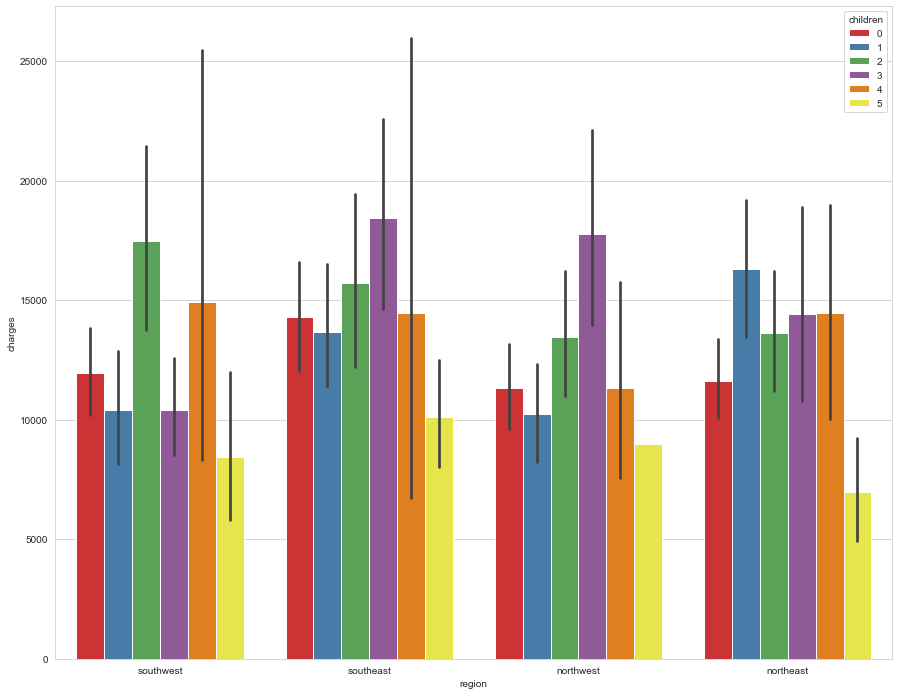

In [14]:
f , ax = plt.subplots(1,1,figsize = (15,12))
ax = sns.barplot(x = 'region', y = 'charges', hue = 'children', data =data, palette = 'Set1')

**Now let's Analyze the Medical Insurance Charges by Age, BMI (Body Mass Index) and children according to the smoking factor**

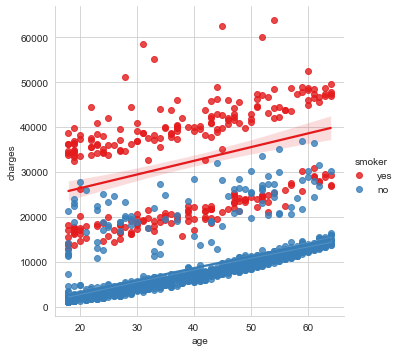

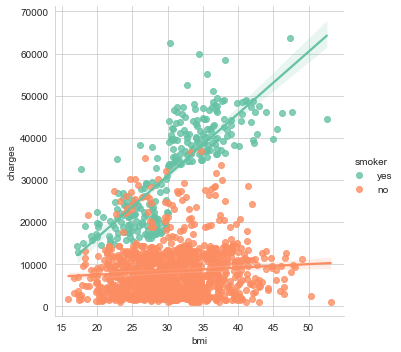

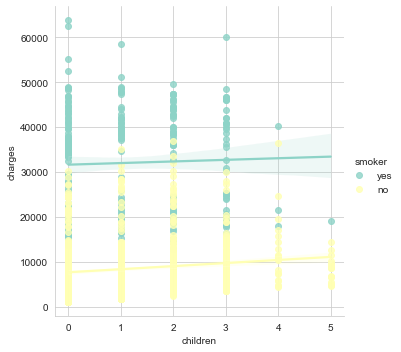

In [15]:
ax = sns.lmplot(x = 'age', y = 'charges' , hue = 'smoker', data = data, palette = 'Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges' , hue = 'smoker', data = data, palette = 'Set2')
ax = sns.lmplot(x = 'children', y = 'charges' , hue = 'smoker', data = data, palette = 'Set3')

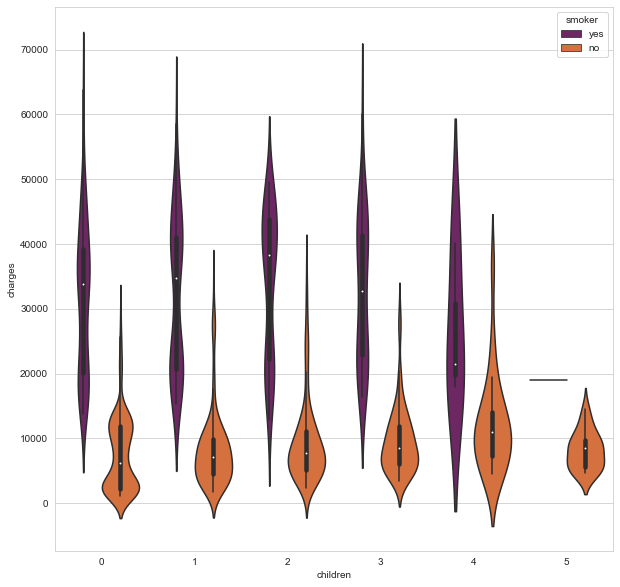

In [16]:
f,ax=plt.subplots(1,1,figsize=(10,10))
ax=sns.violinplot(x='children',y='charges',data=data,orient='v',hue='smoker',palette='inferno')

**Now look at the whole data**

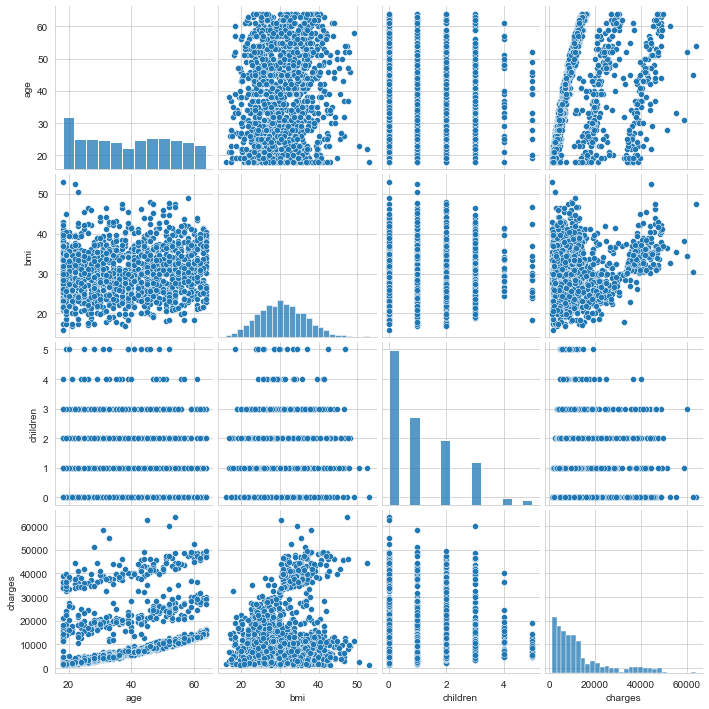

In [17]:
sns.pairplot(data)

**Now look at the Profile Report of this Dataset**

In [18]:
proff = ProfileReport(data)

In [19]:
proff

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Now look at the features column one at a time**

In [20]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<AxesSubplot:xlabel='region', ylabel='count'>

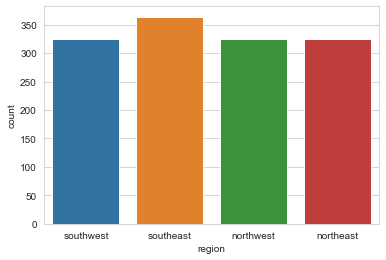

In [21]:
sns.countplot(x = 'region', data = data)

**Visualizing the same for sex**

<AxesSubplot:xlabel='sex', ylabel='count'>

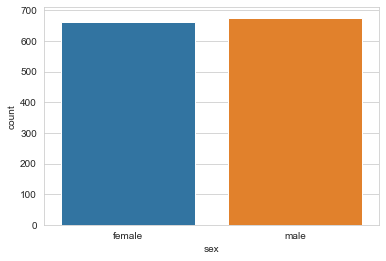

In [22]:
sns.countplot(x = 'sex', data = data)

**Now let's observe the feature charges**

A distplot plots a univariate distribution of observations.


C:\Users\Kishan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

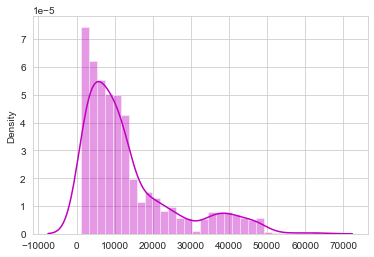

In [23]:
sns.distplot(x= data['charges'], color = 'm')

If we apply log function into that

C:\Users\Kishan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

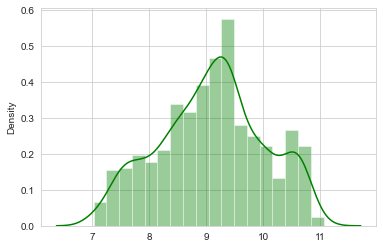

In [24]:
sns.distplot(x = np.log(data['charges']),color = 'g')

**Now let's see the Correlation between the variables using heatmap**

<AxesSubplot:>

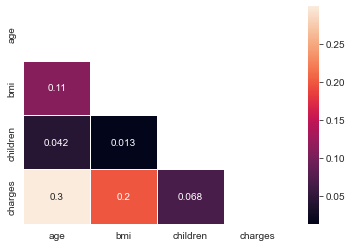

In [25]:
corr = data.corr('pearson')
mask = np.triu(corr)
sns.heatmap(corr, linewidth = 0.5 , mask = mask , annot = True)

**Variable Transformation** :
Lets transform the variable from string to discrete integer values
But for this we will Re-run the cell which reads the data using pandas & now we will start **Model Building Process**

In [26]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
label.fit(data.sex.drop_duplicates())
data.sex=label.transform(data.sex)
label.fit(data.smoker.drop_duplicates())
data.smoker=label.transform(data.smoker)
label.fit(data.region.drop_duplicates())
data.region=label.transform(data.region)

**Now prepare our input and output set of data as x and y and split them into to subsets train and test**

In [27]:
x=data.drop(['charges'],axis=1)
y=data['charges']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [28]:
Lin_reg=LinearRegression()
Lin_reg.fit(x_train,y_train)

LinearRegression()

In [29]:
print(Lin_reg.score(x_test,y_test))

0.7998747145449959


We can see that **Linear Regression** has an **accuract of 0.799 OR 0.8**
In other words this model performs 80% with the test data.
Now look at the various models we've imported and How they performs,
**Now Train the Models**

In [30]:
linreg = LinearRegression()
rfc = RandomForestRegressor(n_estimators = 500 , max_features = 6 , max_depth = 10 , min_samples_leaf = 6)
abr = AdaBoostRegressor(learning_rate = 0.1 )
gbr = GradientBoostingRegressor()
xgb = XGBRegressor(gamma = 0.5)

In [31]:
models = [linreg, rfc, abr, gbr, xgb]

In [32]:
def training(model):
    score_dict =[]
    error_dict =[]
    for m in model:
        m.fit(x_train,y_train)
        score = m.score(x_test, y_test)
        y_pred = m.predict(x_test)
        model_rmse = mean_squared_error(y_test, y_pred, squared = False)
        print("for the model",m, "the acceuracy & error are ", score, model_rmse)
        score_dict.append(score)
        error_dict.append(model_rmse)
    print("the final Results are :\n")
    print(score_dict)
    print(error_dict)

In [33]:
training(models)

for the model LinearRegression() the acceuracy & error are  0.7998747145449959 5643.219748880902
for the model RandomForestRegressor(max_depth=10, max_features=6, min_samples_leaf=6,
                      n_estimators=500) the acceuracy & error are  0.8996104069756128 3996.872797013218
for the model AdaBoostRegressor(learning_rate=0.1) the acceuracy & error are  0.8715409905947918 4521.24731977674
for the model GradientBoostingRegressor() the acceuracy & error are  0.8981191175207733 4026.4501723309877
for the model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.5, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, m

As we can see **Random_Forest_Regressor** has the highest accuracy, so we will go with that model

In [34]:
RFC = RandomForestRegressor(n_estimators = 500 , max_features = 6 , max_depth = 10 , min_samples_leaf = 6)
RFC.fit(x_train , y_train)

RandomForestRegressor(max_depth=10, max_features=6, min_samples_leaf=6,
                      n_estimators=500)

In [35]:
score = RFC.score(x_test, y_test)

In [36]:
print(score)

0.9003704869657705


## Conclusion
We can predict medical insurance charges of a person given the five features age, sex, bmi, children, smoker, region with **89% Accuracy**. 

## Predict Charges for New_Customer

In [37]:
data = {'age': 50,
        'sex': 1,
        'bmi': 40.30,
        'children': 4,
        'smoker':1,
        'region': 2}

df = pd.DataFrame(data, index=[0])
df

,age,sex,bmi,children,smoker,region
0,50,1,40.3,4,1,2


In [38]:
new_pred = RFC.predict(df)
new_pred

array([45465.30080201])

## Save Model Using Joblib

In [39]:
RFC = RandomForestRegressor()
RFC.fit(x,y)

RandomForestRegressor()

In [40]:
import joblib

In [41]:
joblib.dump(RFC,'RFC_Model')

['RFC_Model']

In [42]:
Model = joblib.load('RFC_Model') #successfully loded model

In [43]:
Model.predict(df)

array([45380.6672512])

## GUI (Graphical User Interface)

In [44]:
from tkinter import *

In [45]:
def show_entry():
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    
    model = joblib.load('RFC_Model')
    result = model.predict([[p1, p2, p3, p4, p5, p6]])
    
    Label(master, text = "INSURANCE COST").grid(row=7)
    Label(master, text = result).grid(row=8)
                   
master = Tk()
master.title ("Medical Insurance Cost Prediction")
label = Label(master, text = "Medical Insurance Cost Prediction", bg = "Black", fg = "white").grid(row = 0, columnspan = 2)

Label(master, text = "ENTER AGE").grid(row = 1)
Label(master, text = "Male OR Female [1/0]").grid(row = 2)
Label(master, text = "ENTER BMI").grid(row = 3)
Label(master, text = "ENTER NUMBER OF CHILDREN").grid(row = 4)
Label(master, text = "DO YOU SMOKER? YES/NO [1/0]").grid(row = 5)
Label(master, text = "Region [1-4]").grid(row = 6)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)

Button(master, text = "SUBMIT", command = show_entry).grid()

mainloop()

# Thank You...